In [1]:
from PIL import Image
import warnings

# Increase the pixel limit
# Removes the limit, allowing images of any size
Image.MAX_IMAGE_PIXELS = None
# Suppress DecompressionBombWarning
warnings.simplefilter('ignore', Image.DecompressionBombWarning)

In [3]:
def split_image_by_pixels(image_path, patch_width, patch_height):
    image = Image.open(image_path)
    image_width, image_height = image.size

    patches = []
    coordinates = []

    for i in range(0, image_width, patch_width):
        for j in range(0, image_height, patch_height):
            # Define the right and lower bounds for the patch
            right = min(i + patch_width, image_width)
            lower = min(j + patch_height, image_height)

            # Create the bounding box and crop the image
            box = (i, j, right, lower)
            patch = image.crop(box)

            # Append the patch and its top-left corner coordinates
            patches.append(patch)
            coordinates.append((i, j))

    return patches, coordinates

# Example usage
large_image_path = 'img.jpg'  # Replace with your image path
patch_width = 2500  # Define the patch width
patch_height = 2500  # Define the patch height

# Split the image into patches
patches, coordinates = split_image_by_pixels(large_image_path, patch_width, patch_height)

# Optional: Save the patches for inspection
# for idx, patch in enumerate(patches):
#     patch.save(f'patch_{idx}.jpg')

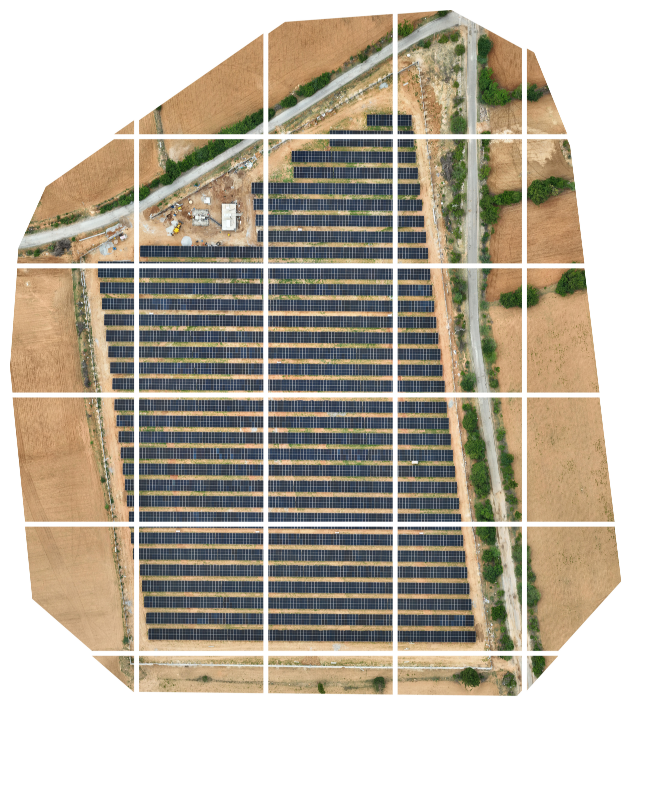

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def display_patches_with_gaps(patches, coordinates, image_width, image_height, patch_width, patch_height, gap=100):
    # Calculate the number of patches in both dimensions
    num_patches_x = (image_width + patch_width - 1) // patch_width
    num_patches_y = (image_height + patch_height - 1) // patch_height

    # Calculate the dimensions of the canvas with gaps
    canvas_width = num_patches_x * (patch_width + gap) - gap
    canvas_height = num_patches_y * (patch_height + gap) - gap

    # Create a white canvas
    canvas = Image.new('RGB', (canvas_width, canvas_height), color=(255, 255, 255))

    # Paste each patch onto the canvas with gaps
    for patch, (x, y) in zip(patches, coordinates):
        # Calculate new position with gaps
        new_x = x + (x // patch_width) * gap
        new_y = y + (y // patch_height) * gap
        canvas.paste(patch, (new_x, new_y))

    # Display the canvas
    plt.figure(figsize=(10, 10))
    plt.imshow(canvas)
    plt.axis('off')  # Hide axes
    plt.show()

large_image_path = 'img.jpg'  # Replace with your image path
original_image = Image.open(large_image_path)
image_width, image_height = original_image.size

display_patches_with_gaps(patches, coordinates, image_width, image_height, patch_width, patch_height, gap=100)


In [5]:
from PIL import Image

def reconstruct_image_from_pixels(patches, coordinates, image_width, image_height):
    # Create a new image with the same size as the original
    stitched_image = Image.new('RGB', (image_width, image_height), color=(255, 255, 255))  # White background

    # Place each patch back into the image at the correct position
    ##### IMPORTANT #####
    # Here we will use the trained segmentation model for segmenting the patched images and then
    # stitching them with respect to their relative coordinates
    for patch, (x, y) in zip(patches, coordinates):
        stitched_image.paste(patch, (x, y))

    return stitched_image

# Step 3: Reconstruct the image from the patches
original_image = Image.open(large_image_path)
image_width, image_height = original_image.size
reconstructed_image = reconstruct_image_from_pixels(patches, coordinates, image_width, image_height)

# Save the stitched image to a file
output_file_path = '/content/stitched_image.png'  # Specify your desired file path and name
reconstructed_image.save(output_file_path)

print(f"Stitched image saved to {output_file_path}")

Stitched image saved to /content/stitched_image.png
